understanding the data


In [1]:
#Importing Necessary Libraries
import numpy #used for numerical analysis
import tensorflow #open source used for both NL and DL for computation
from tensorflow.keras.datasets import mnist #mnist datoser
from tensorflow.keras.models import Sequential #it is a plain stack of Layers
from tensorflow.keras import layers# A Layer consists of a tensor-in tensor-out computation function
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected
#Faltten-used for flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #Convolutional Layer
from keras.optimizers import Adam #optimizer
from keras.utils import np_utils #used for one-hot encoding

In [2]:
#load data
(x_train, y_train), (x_test, y_test) = mnist.load_data() #splitting the mist data into train and test

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(x_train.shape) #shope is used for give the dimension values #60000-rows 28x28-pixels 
print (x_test.shape)
(68000, 28, 28)
(10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


(10000, 28, 28)

In [4]:
#Understanding the data
x_train[0] #printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
y_train[0]#printing Lable of first image

5

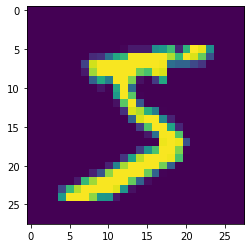

In [6]:
import matplotlib.pyplot as plt #used for data visualization 
plt.imshow(x_train[0]) #ploting the index=0 image


In [7]:
#Reshaping Dataset
#Reshaping to format which CNN expects (batch, height, width, channels) 
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32') 
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [8]:
#One-Hot Encoding
#one hot encode
number_of_classes = 10 #storing the no. classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test= np_utils.to_categorical (y_test, number_of_classes)

In [9]:
y_train[0] #printing the new Label


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [10]:
#Creating the Model
#create model
model =Sequential()
#adding model Layer
model.add(Conv2D (64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D (32, (3, 3), activation='relu'))
#model.add(Conv20(32, (3, 3), activation="relu"))
#flotten the dimension of the image
model.add(Flatten())
#output Layer with 10 neurons
model.add(Dense(number_of_classes, activation='softmax'))

In [11]:
#Compiling the model
# Compile mode
model.compile(loss="categorical_crossentropy", optimizer =
              "Adam", metrics=['accuracy'])

In [12]:
# Fit the model
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 217s 115ms/step - loss: 0.2877 - accuracy: 0.9485 - val_loss: 0.1008 - val_accuracy: 0.9687
Epoch 2/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0919 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 202s 108ms/step - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0997 - val_accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0913 - val_accuracy: 0.9742
Epoch 5/5
1875/1875 [==============================] - 206s 110ms/step - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.1089 - val_accuracy: 0.9756


In [13]:
#Observing the metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=8)
print("Metrics (Test loss & Test Accuracy): ") 
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.10893940180540085, 0.975600004196167]


In [16]:
#Predicting the output
prediction= model.predict(x_test[:4])
print (prediction)

1/1 [==============================] - 0s 116ms/step
[[1.6426258e-11 4.0121426e-20 1.0953454e-12 2.6627710e-13 1.1442532e-19
  5.1056392e-20 1.1558602e-21 1.0000000e+00 2.9396868e-10 8.2979289e-13]
 [9.5224009e-11 7.3399224e-11 1.0000000e+00 2.6145191e-12 4.7941551e-16
  2.5989093e-18 2.7404319e-08 5.0329622e-15 1.1241052e-11 1.7845892e-17]
 [1.7456649e-10 9.9999833e-01 1.7339131e-08 8.8896325e-14 6.3351212e-07
  1.3157173e-11 4.8014624e-11 2.5391208e-12 1.0242418e-06 1.8629589e-11]
 [9.9999905e-01 5.0930925e-18 1.0600600e-08 8.3612159e-13 9.1536001e-10
  3.9435410e-11 8.8729848e-07 3.8270217e-13 1.2968936e-09 2.3918706e-10]]


In [17]:
import numpy as np
print (np.argmax(prediction, axis=1)) #printing our labels from first 4 images
print (y_test[:4]) #printing the actual labels

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
#Observing the metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=8) 
print("Metrics (Test loss & Test Accuracy): ")
print(metrics)

Metrics (Test loss & Test Accuracy): 
[0.10893940180540085, 0.975600004196167]


In [19]:
#Predicting the output
prediction= model.predict(x_test[:4]) 
print (prediction)

1/1 [==============================] - 0s 28ms/step
[[1.6426258e-11 4.0121426e-20 1.0953454e-12 2.6627710e-13 1.1442532e-19
  5.1056392e-20 1.1558602e-21 1.0000000e+00 2.9396868e-10 8.2979289e-13]
 [9.5224009e-11 7.3399224e-11 1.0000000e+00 2.6145191e-12 4.7941551e-16
  2.5989093e-18 2.7404319e-08 5.0329622e-15 1.1241052e-11 1.7845892e-17]
 [1.7456649e-10 9.9999833e-01 1.7339131e-08 8.8896325e-14 6.3351212e-07
  1.3157173e-11 4.8014624e-11 2.5391208e-12 1.0242418e-06 1.8629589e-11]
 [9.9999905e-01 5.0930925e-18 1.0600600e-08 8.3612159e-13 9.1536001e-10
  3.9435410e-11 8.8729848e-07 3.8270217e-13 1.2968936e-09 2.3918706e-10]]


In [20]:
import numpy as np
print (np.argmax(prediction, axis=1)) #printing our labels from first 4 images
print (y_test[:4]) #printing the actual labels

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [21]:
#Saving the model
# Save the model
model.save('models/mnistCNN.h5')

In [ ]:
#Taking images as input and checking results
#Importing the Keras Libraries and packages
from tensorflow.keras.models import load_model
model = load_model(r'C:\Users\karthik\models\mnistCNN.h5')
from PIL import Image # used for manipulating image uploaded by the user.
import numpy as np #used for numerical analysis
for index in range(4):
    img = Image.open(r"C:\Users\karthik\PROJECT IBM\models\archive\mnist_png\mnist_png\testing\0\3.png") #convert image to monochrome

    img = img.resize((28,28))# resizing of input image
    im2arr =  np.array(img) #converting to image
    im2arr = im2arr.reshape(1,28,28,1) #reshaping according to our requirement
    #Predicting the Test set results
    y_pred =  model.predict(im2arr) #predicting the results
    print(y_pred)